# sonar3 data, classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [2]:
np.random.seed(3)
tf.compat.v1.set_random_seed(3)

In [3]:
df = pd.read_csv('./data/sonar3.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,0
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,0
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,0
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,0
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,0


In [4]:
df[60].value_counts()

60
1    111
0     97
Name: count, dtype: int64

In [5]:
X = df.iloc[:, 0:60]
y = df.iloc[:, 60]

X, y

(         0       1       2       3       4       5       6       7       8   \
 0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
 1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
 2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
 3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
 4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
 ..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
 203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
 204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
 205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
 206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
 207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   
 
          9   ...      50      51     

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

In [7]:
model = Sequential()

model.add(Input(shape=(60,)))  # Input 객체를 첫 레이어로 사용
model.add(Dense(24, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [8]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [9]:
hist = model.fit(X_train, y_train, epochs=80, batch_size=10)

Epoch 1/80
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5721 - loss: 0.6964
Epoch 2/80
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6103 - loss: 0.6790 
Epoch 3/80
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6754 - loss: 0.6691 
Epoch 4/80
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6785 - loss: 0.6605 
Epoch 5/80
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7146 - loss: 0.6524 
Epoch 6/80
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7039 - loss: 0.6428 
Epoch 7/80
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7186 - loss: 0.6321 
Epoch 8/80
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7268 - loss: 0.6207 
Epoch 9/80
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7345 - loss: 0.6075 
Epoch 10/80
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7358 - loss: 0.5949
Epoch 11/80
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7350 - loss: 0.5817
Epoch 12/80
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7

In [10]:
model.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.8735 - loss: 0.3984   


[0.41753441095352173, 0.8571428656578064]

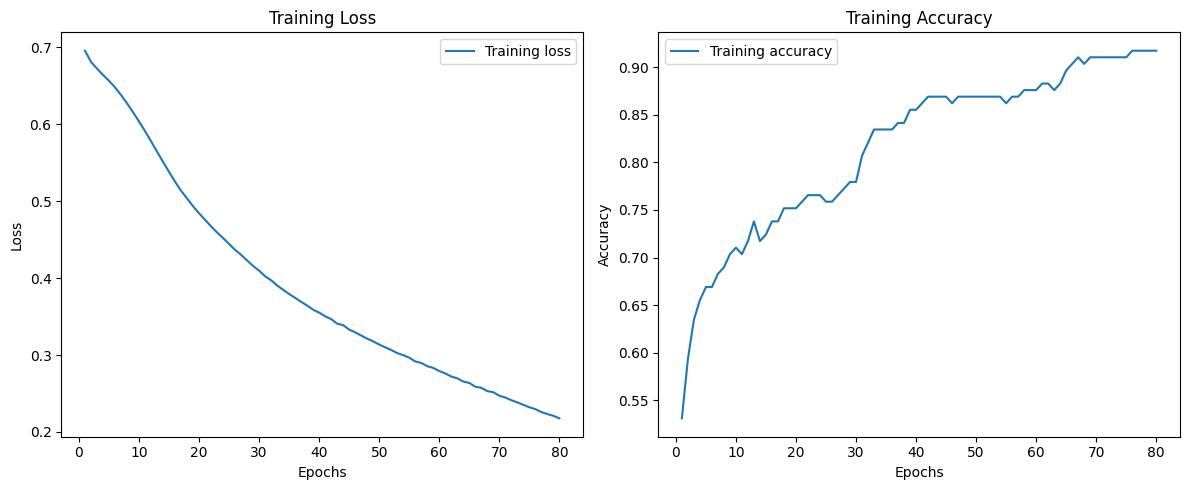

In [11]:
loss = hist.history['loss']
accuracy = hist.history['accuracy']
epochs = range(1, len(loss) + 1)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, label='Training loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, label='Training accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()


# KFold cross validation

In [12]:
df = pd.read_csv("./data/sonar3.csv", header=None)

In [13]:
X = df.iloc[:, 0:60]
y = df.iloc[:, 60]

X, y

(         0       1       2       3       4       5       6       7       8   \
 0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
 1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
 2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
 3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
 4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
 ..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
 203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
 204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
 205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
 206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
 207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   
 
          9   ...      50      51     

In [14]:
k=5
kfold = KFold(n_splits=k, shuffle=True)

In [15]:
acc_score = []

def model_fn():
    model = Sequential()
    model.add(Input(shape=(60,)))
    model.add(Dense(24, activation="relu"))
    model.add(Dense(10, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))

    return model

In [16]:
for train_index, test_index in kfold.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model = model_fn()
    model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])
    hist = model.fit(X_train, y_train, epochs=200, batch_size=10, verbose=0)

    accuracy = model.evaluate(X_test, y_test)
    print(accuracy)
    acc_score.append(accuracy[1])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7634 - loss: 0.7727  
[0.7042320966720581, 0.7857142686843872]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8631 - loss: 0.7726  
[0.8387543559074402, 0.8571428656578064]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - accuracy: 0.8423 - loss: 0.7875
[0.7172096967697144, 0.8571428656578064]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7703 - loss: 0.8588  
[0.8195430636405945, 0.7804877758026123]
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7866 - loss: 1.1904 
[1.0916110277175903, 0.8048780560493469]


In [17]:
acc_score

[0.7857142686843872,
 0.8571428656578064,
 0.8571428656578064,
 0.7804877758026123,
 0.8048780560493469]

In [18]:
avg_acc_score = sum(acc_score) / k
print(avg_acc_score)

0.8170731663703918
